#### REDI ML: PROJECT ONE (PART B)
##### "Project-based North American pumpkin prices (Linear & Polynomial Regression)"
##### Date: September 26, 2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
pumpkins = pd.read_csv("C:/Users/Mercy Akinloye/Desktop/CODE/Jupyter/RediML_P1/ML-For-Beginners/2-Regression/data/US-pumpkins.csv", encoding = 'utf-8')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
#Package filtered according to "bushel" unit
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [4]:
#pick new columns 
#drop variables that are not needed

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

In [5]:
avg_price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

In [6]:
month = pd.DatetimeIndex(pumpkins['Date']).month

In [7]:
#what is going on here?

day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

In [8]:
new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Average Price': avg_price})

In [9]:
#price per bushel

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Average Price'] = avg_price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Average Price'] = avg_price*2

In [10]:
import matplotlib.pyplot as plt

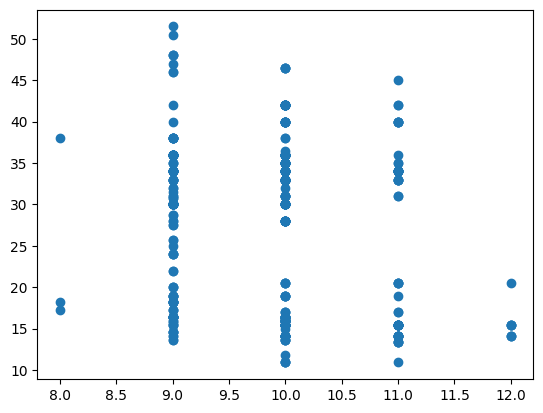

In [11]:
plt.scatter('Month','Average Price', data=new_pumpkins)

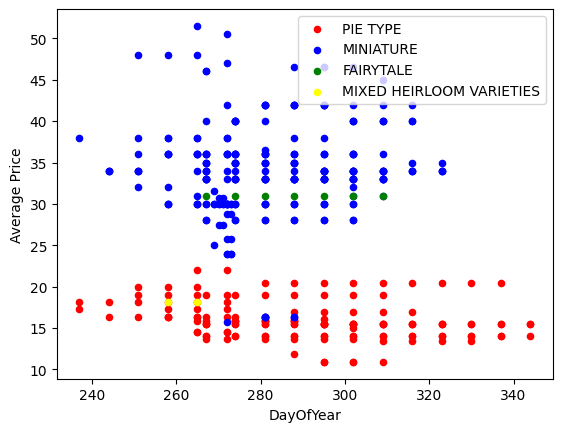

In [12]:
#breakdown this code
#represent different types of pumpkins with colors

ax=None #what is ax?
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Average Price',ax=ax,c=colors[i],label=var)

<AxesSubplot: xlabel='DayOfYear', ylabel='Average Price'>

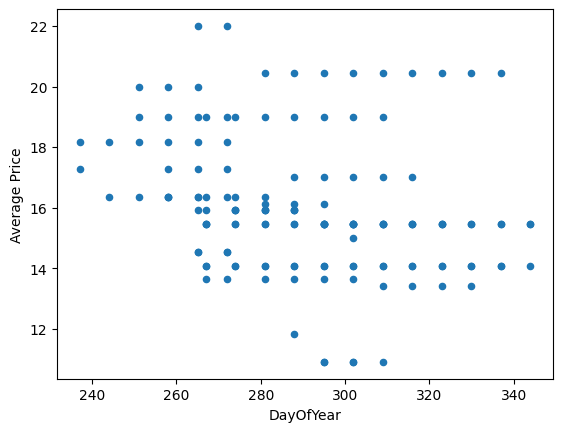

In [13]:
#scatterplot for price of one pumpkin type

pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear', 'Average Price')

In [14]:
pie_pumpkins

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Average Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
...,...,...,...,...,...,...,...,...
1626,10,295,PIE TYPE,PHILADELPHIA,1 1/9 bushel cartons,12.0,12.0,10.909091
1627,10,302,PIE TYPE,PHILADELPHIA,1 1/9 bushel cartons,12.0,12.0,10.909091
1628,8,237,PIE TYPE,PHILADELPHIA,1 1/9 bushel cartons,18.0,20.0,17.272727
1629,9,258,PIE TYPE,PHILADELPHIA,1 1/9 bushel cartons,18.0,18.0,16.363636


In [15]:
#choose two columns for pie_pumpkins: DayOfYear & Average Price

df_ppumpkins = pie_pumpkins[['DayOfYear', 'Average Price']]

In [16]:
df_ppumpkins.corr(method = 'pearson')

#correlation is a -0.27, why does training a predictive model make sense?

,DayOfYear,Average Price
DayOfYear,1.000000,-0.266919
Average Price,-0.266919,1.000000


In [17]:
#dropping missing values before Linear Regression

pie_pumpkins.dropna(inplace=True) #meaning of output message
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          144 non-null    int64  
 1   DayOfYear      144 non-null    int64  
 2   Variety        144 non-null    object 
 3   City           144 non-null    object 
 4   Package        144 non-null    object 
 5   Low Price      144 non-null    float64
 6   High Price     144 non-null    float64
 7   Average Price  144 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 10.1+ KB


C:\Users\Mercy Akinloye\AppData\Local\Temp\ipykernel_10096\3560529010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True) #meaning of output message


#### Simple Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [19]:
#reshape needed cause LR uses 2D-array as an input
#we only have one input so we need array with shape Nx1 (N = dataset size)
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Average Price']

In [20]:
#split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [22]:
print(lin_reg)

LinearRegression()


In [23]:
print(lin_reg.coef_)

#output = -0.02 --> price drops around 2 cents per day

[-0.01751876]


In [24]:
print(lin_reg.intercept_)

#output = 21 --> price at the beginning of the year is around 21 dollars

21.133734359909326


In [25]:
#check accuracy and predict prices with test dataset
# MSE metrics: mean square error -->  mean of all squared differences between expected & predicted value

pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

#check the math behind MSE


Mean error: 2.77 (17.2%)


In [26]:
#check coefficient of determination 

score = lin_reg.score(X_train,y_train) #review LR code
print('Model determination: ', score)

#output: 
#0 - worst linear predictor, input data not taken into account  
#1 - best linear predictor, predicted all expected outcome

#result = 0.04 --> pretty low

Model determination:  0.04460606335028361


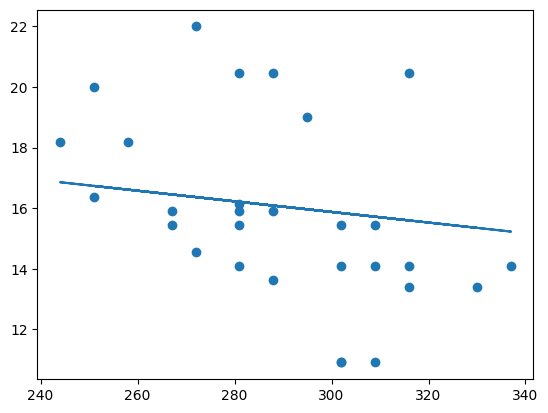

In [27]:
#plot regression line

plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

### Polynomial Regression

- price can fluctuate so relationship cannot necessarily be determined by a linear line
- Ex with pumpkin data:

In [28]:
#PR creates curved line to better fit nonlinear data 
#DayOfYear variable is squared and introduced into the input data

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [29]:
#pipeline - first, adds polynomial features to model, then trains regression

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
#Polynomial Feature

In [30]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [31]:
print(pipeline)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])


In [32]:
#ERROR: unless you add [1]

print(pipeline[1].coef_)

[ 0.         -0.32646603  0.00052594]


In [33]:
print(pipeline[1].intercept_)

66.16630246971464


In [43]:
poly_pred = pipeline.predict(X_test)

NotFittedError: This PolynomialFeatures instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [35]:
#to convert categorical variable into numeric form, can use one hot encoding 
pd.get_dummies(new_pumpkins['Variety'])

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,0,0,0,1
71,0,0,0,1
72,0,0,0,1
73,0,0,0,1
74,0,0,0,1
...,...,...,...,...
1738,0,1,0,0
1739,0,1,0,0
1740,0,1,0,0
1741,0,1,0,0


In [37]:
#train linear regression w/ one-hot encoded variety as input
#initialize X and y data correctly

X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Average Price']

In [38]:
#combine different variables (categorical and numerical ones) to train LR and get more accurate predictions
#pd.get_dummies --> convert categorical variables into the numeric form
#.join --> combine different variables for training LR

#setting up training data
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Average Price']

In [39]:
#make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
#Setting up & training pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [51]:
#Predict results for test data
pred = pipeline.predict(X_test)

In [52]:
#calculate MSE and determination 
mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train, y_train)
print('Model determination: ', score)

#Output: MSE = 2.5 (~9% prediction error), determination coefficient ~ 96%

Mean error: 2.5 (9.17%)
Model determination:  0.9556605233749337


# DONE
##### Can be added: a table comparing the mse & determination of the models (DayOfYear - Linear/Polynomial, Variety - Linear, All features - Linear/Polynomial)